In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from evalys.jobset import JobSet, ProcSet
from evalys.visu.legacy import plot_gantt

In [2]:
def visualize_avg_waiting_time(jobs_f, sim_f, jobs_e, sim_e):
    fcfs, easy = jobs_f.to_dataframe(), jobs_e.to_dataframe()

    fcfs, easy = JobSet(fcfs), JobSet(easy)

    fcfs, easy = sim_f.to_dataframe(), sim_e.to_dataframe()
    fcfs['name'], easy['name'] = "FCFS", "EASY"
    benchmark = pd.concat([fcfs, easy], ignore_index=True)

    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.bar('name', 'mean_waiting_time', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Waiting Time")

    plt.subplot(1, 2, 2)
    plt.bar('name', 'mean_slowdown', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Slowdown")

    plt.show()
    
def visualize_schedule(jobs_easy_batsim, jobs_easy_sp, filepath, max_x):

    _, ax_list = plt.subplots(nrows=2, ncols=1, figsize=(150, 8))
    plot_gantt(jobs_easy_batsim, ax=ax_list[0], title="BATSIM")
    plot_gantt(jobs_easy_sp, ax=ax_list[1], title="SP")

    ax_list[0].set_ylim(0, 8)
    ax_list[1].set_ylim(0, 8)
    ax_list[0].set_xlim(0, max_x)
    ax_list[1].set_xlim(0, max_x)
    ax_list[0].set_yticks(range(8))
    ax_list[1].set_yticks(range(8))

    plt.savefig(filepath)
    plt.show()


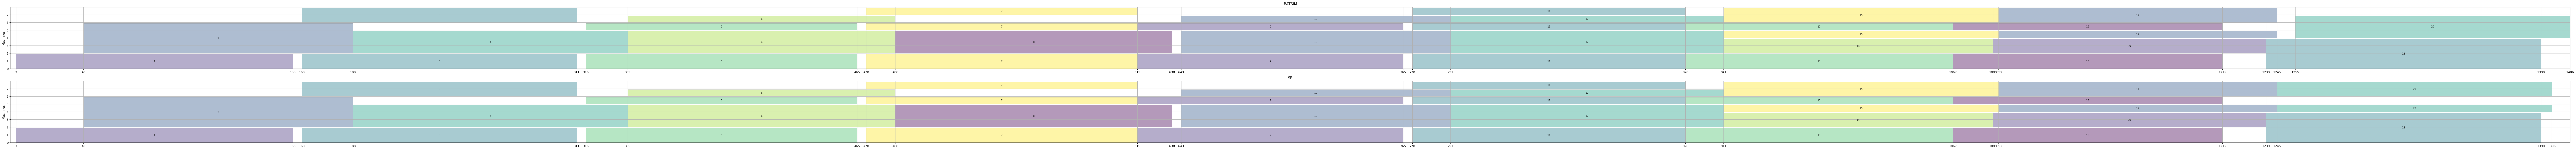

In [12]:
jobs_easy_batsim = pd.read_csv('result_validate/batsimpy_jobs_t30.csv')
jobs_easy_batsim['job_id'] = jobs_easy_batsim['job_id'].astype(str)
jobs_easy_batsim['profile'] = jobs_easy_batsim['profile'].astype(str) 
jobs_easy_batsim = pd.DataFrame(jobs_easy_batsim)
max_jobs_easy_batsim = jobs_easy_batsim['finish_time'].max()
jobs_easy_batsim['allocated_resources'] = jobs_easy_batsim['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_batsim = JobSet(jobs_easy_batsim)

jobs_easy_sp = pd.read_csv('result_validate/hpcv2_jobs_t30.csv')
jobs_easy_sp['job_id'] = jobs_easy_sp['job_id'].astype(str)  
jobs_easy_sp['profile'] = jobs_easy_sp['profile'].astype(str)
jobs_easy_sp = pd.DataFrame(jobs_easy_sp)
max_jobs_easy_sp = jobs_easy_sp['finish_time'].max()
jobs_easy_sp['allocated_resources'] = jobs_easy_sp['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_sp = JobSet(jobs_easy_sp)

max_x = max(max_jobs_easy_batsim, max_jobs_easy_sp)

visualize_schedule(jobs_easy_batsim, jobs_easy_sp, 'plt/comparison/easy_t30_validate.png', max_x)

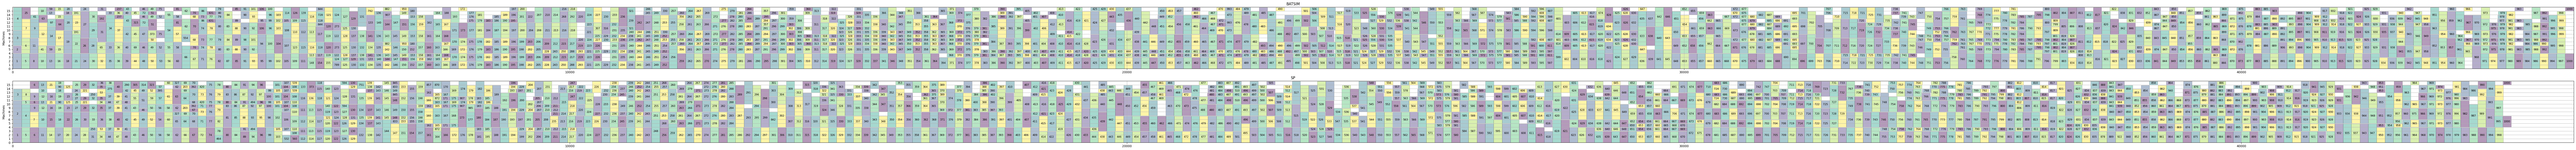

In [5]:
timeout = 30
jobs_easy_batsim = pd.read_csv(f'results/batsim/timeout/easy_jobs_t{timeout}.csv')
jobs_easy_batsim['job_id'] = jobs_easy_batsim['job_id'].astype(str)
jobs_easy_batsim['profile'] = jobs_easy_batsim['profile'].astype(str) 
jobs_easy_batsim = pd.DataFrame(jobs_easy_batsim)
max_jobs_easy_batsim = jobs_easy_batsim['finish_time'].max()
jobs_easy_batsim['allocated_resources'] = jobs_easy_batsim['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_batsim = JobSet(jobs_easy_batsim)

jobs_easy_sp = pd.read_csv(f'results/cssp/timeout/easy_jobs_t{timeout}.csv')
jobs_easy_sp['job_id'] = jobs_easy_sp['job_id'].astype(str)  
jobs_easy_sp['profile'] = jobs_easy_sp['profile'].astype(str)
jobs_easy_sp = pd.DataFrame(jobs_easy_sp)
max_jobs_easy_sp = jobs_easy_sp['finish_time'].max()
jobs_easy_sp['allocated_resources'] = jobs_easy_sp['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_sp = JobSet(jobs_easy_sp)



max_x = max(max_jobs_easy_batsim, max_jobs_easy_sp)

visualize_schedule(jobs_easy_batsim, jobs_easy_sp, 'plt/comparison/easy_t30.png', max_x)

In [7]:
# compare jobs monitor SP-Timeout and BATSIM-Timeout
timeout = 30
jobs_easy_batsim = pd.read_csv(f'result_validate/batsim_jobs_t{timeout}.csv')
jobs_easy_sp = pd.read_csv(f'result_validate/hpcv2_jobs_t{timeout}.csv')
# jobs_easy_batsim = pd.read_csv(f'results/batsim/baseline/easy_jobs_fe_0.csv')
# jobs_easy_sp = pd.read_csv(f'results/cssp/baseline/easy_jobs_fe_0.csv')

jobs_easy_batsim = jobs_easy_batsim.sort_values(by='job_id', ascending=True).reset_index(drop=True)
jobs_easy_sp = jobs_easy_sp.sort_values(by='job_id', ascending=True).reset_index(drop=True)

execution_time_diff = jobs_easy_batsim['execution_time'] - jobs_easy_sp['execution_time']
start_time_diff = jobs_easy_batsim['starting_time'] - jobs_easy_sp['starting_time']
finish_time_diff = jobs_easy_batsim['finish_time'] - jobs_easy_sp['finish_time']

def expand_ranges(input_str):
    parts = input_str.split()
    result = []

    for part in parts:
        if '-' in part:
            start, end = map(int, part.split('-'))
            result.extend(str(i) for i in range(start, end + 1))
        else:
            result.append(part)

    result = sorted(result)
    return ' '.join(result)

same_node_used = jobs_easy_batsim['allocated_resources'].apply(expand_ranges) == jobs_easy_sp['allocated_resources'].apply(expand_ranges)

result_df = pd.DataFrame({
    'job_id': jobs_easy_batsim['job_id'],
    'sp_start': jobs_easy_sp['starting_time'],
    'batsim_start': jobs_easy_batsim['starting_time'],
    'sp_finish': jobs_easy_sp['finish_time'],
    'batsim_finish': jobs_easy_batsim['finish_time'],
    'start_diff': start_time_diff,
    'exec_diff': execution_time_diff,
    'finish_diff': finish_time_diff,
    'same_node_used': same_node_used,
    "batsim_node_used": jobs_easy_batsim['allocated_resources'],
    "sp_node_used": jobs_easy_sp['allocated_resources']
})

display(result_df)


job_id  sp_start  batsim_start  sp_finish  batsim_finish  start_diff  \
0        1         1           5.0        147          155.0         4.0   
1        2         3          14.0        153          165.0        11.0   
2        3       152         155.0        304          306.0         3.0   
3        4       153         165.0        304          317.0        12.0   
4        5       304         306.0        455          459.0         2.0   
5        6       304         340.0        452          485.0        36.0   
6        7       304         190.0        451          340.0      -114.0   
7        8       451          40.0        601          190.0      -411.0   
8        9       452         459.0        601          610.0         7.0   
9       10       455         485.0        608          635.0        30.0   
10      11       601         615.0        749          766.0        14.0   
11      12       601         640.0        753          792.0        39.0   
12      13       608         766.0        756          916.0       158.0   
13      14       749         792.0        903          941.0        43.0   
14      15       753         792.0        902          941.0        39.0   
15      16       756         941.0        907         1096.0       185.0   
16      17       756         941.0        907         1091.0       185.0   
17      18       903        1091.0       1054         1241.0       188.0   
18      19       907        1101.0       1056         1251.0       194.0   
19      20      1054        1241.0       1202         1389.0       187.0   

    exec_diff  finish_diff  same_node_used batsim_node_used sp_node_used  
0         4.0          8.0           False              0-3        0 1 2  
1         1.0         12.0           False              4-6      3 4 5 6  
2        -1.0          2.0           False              0-2      0 1 2 7  
3         1.0         13.0           False              3-5      3 4 5 6  
4         2.0          4.0           False              0-2          0 1  
5        -3.0         33.0           False              3-6          2 3  
6         3.0       -111.0           False              6-7      4 5 6 7  
7         0.0       -411.0           False                7      4 5 6 7  
8         2.0          9.0           False              0-2          2 3  
9        -3.0         27.0           False              3-5          0 1  
10        3.0         17.0           False            0-2 6          2 3  
11        0.0         39.0           False            3-5 7          4 5  
12        2.0        160.0           False              0-1      0 1 6 7  
13       -5.0         38.0           False              2-4          2 3  
14        0.0         39.0           False              5-7          4 5  
15        4.0        189.0           False              0-2        0 1 6  
16       -1.0        184.0           False              3-5            7  
17       -1.0        187.0           False              3-5      2 3 4 5  
18        1.0        195.0           False            0-2 6      0 1 6 7  
19        0.0        187.0           False              3-5      2 3 4 5

In [7]:
# Compare nodes states SP-Timeout and BATSIM-Timeout
import pandas as pd
from IPython.display import display

timeout = 30
jobs_easy_batsim = pd.read_csv(f'results/batsim/timeout/easy_host_t{timeout}.csv')
jobs_easy_sp = pd.read_csv(f'results/cssp/timeout/easy_host_t{timeout}.csv')

jobs_easy_batsim = jobs_easy_batsim.sort_values(by='time', ascending=True).reset_index(drop=True)
jobs_easy_sp = jobs_easy_sp.sort_values(by='time', ascending=True).reset_index(drop=True)

columns_to_compare = ['sleeping', 'switching_on', 'switching_off', 'idle', 'computing']

result_df = pd.DataFrame({
    'time': jobs_easy_batsim['time']
})


for col in columns_to_compare:
    result_df[f'{col}_diff'] = jobs_easy_batsim[f'nb_{col}'] - jobs_easy_sp[col]

display(result_df)

# result_df.to_csv('comparison_result.csv', index=False)


time  sleeping_diff  switching_on_diff  switching_off_diff  idle_diff  \
0         0            0.0                0.0                 0.0        0.0   
1         3            0.0                0.0                 0.0        0.0   
2        10            0.0                0.0                 0.0        5.0   
3        12            0.0                0.0                 0.0        4.0   
4        15            0.0                0.0                -2.0        0.0   
...     ...            ...                ...                 ...        ...   
1447  45848            NaN                NaN                 NaN        NaN   
1448  45853            NaN                NaN                 NaN        NaN   
1449  45966            NaN                NaN                 NaN        NaN   
1450  45996            NaN                NaN                 NaN        NaN   
1451  46001            NaN                NaN                 NaN        NaN   

      computing_diff  
0                0.0  
1                0.0  
2               -5.0  
3               -4.0  
4                2.0  
...              ...  
1447             NaN  
1448             NaN  
1449             NaN  
1450             NaN  
1451             NaN  

[1452 rows x 6 columns]

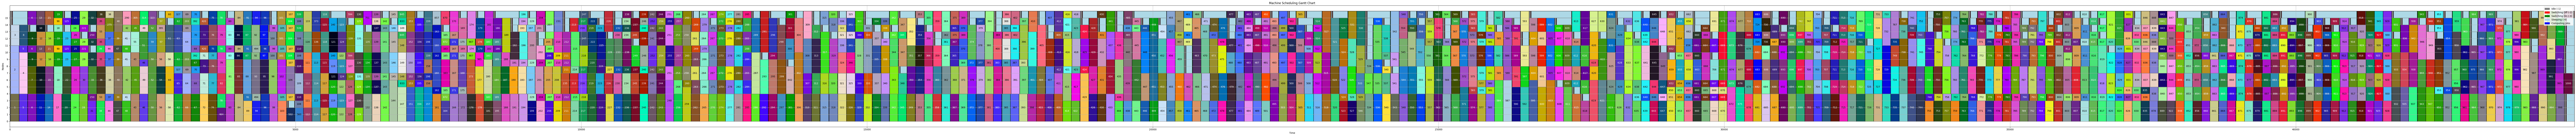

In [9]:
# PLOT SCHEDULE WITHOUT SUBTIME
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

timeout = 30
predict = False
# data = pd.read_csv(f"results/sp/{'tp' if predict else f'timeout'}/easy_nodes_t{timeout}{'_predict' if predict else ''}.csv")
data = pd.read_csv('results/cssp/timeout/easy_nodes_t30.csv')
all_nodes = set()
timeline = []

for index, row in data.iterrows():
    nodes = list(map(int, row['allocated_resources'].split())) 
    all_nodes.update(nodes)
    timeline.append({
        'starting_time': float(row['starting_time']), 
        'finish_time': float(row['finish_time']), 
        'allocated_resources': nodes,
        'type': row['type'], 
        'job_id': int(row['job_id'])
    })

fig, ax = plt.subplots(figsize=(150, 8))
max_time = max([ev['finish_time'] for ev in timeline])
max_node = max(all_nodes)

colors = {
    -1: 'gray',      
    -2: 'red',        
    -3: 'green',    
    -4: 'lightblue'    
}

job_colors = {}

for event in timeline:
    nodes = sorted(event['allocated_resources'])
    groups = []
    while nodes:
        start = nodes[0]
        end = start
        while nodes and nodes[0] == end:
            end += 1
            nodes.pop(0)
        groups.append((start, end - start))
    
    for y, height in groups:
        if event['job_id'] in colors:
            color = colors[event['job_id']]
        else:
            if event['job_id'] not in job_colors:
                job_colors[event['job_id']] = np.random.rand(3,)
            color = job_colors[event['job_id']]
        
        ax.broken_barh([(event['starting_time'], event['finish_time'] - event['starting_time'])], 
                      (y, height), facecolors=color, edgecolor='black')
        
        if event['job_id'] > 0:
            ax.text((event['starting_time'] + event['finish_time'])/2, y + height/2, 
                    str(event['job_id']), ha='center', va='center',
                    color='white' if np.mean(color) < 0.5 else 'black')

ax.set_xlabel('Time')
ax.set_ylabel('Nodes')
ax.set_yticks(range(16))
ax.set_yticklabels(range(16))
ax.set_xlim(0, max_time)
ax.grid(True)

legend_patches = [
    mpatches.Patch(color='gray', label='Idle (-1)'),
    mpatches.Patch(color='red', label='Switching Off (-2)'),
    mpatches.Patch(color='green', label='Switching On (-3)'),
    mpatches.Patch(color='lightblue', label='Sleeping (-4)'),
    mpatches.Patch(color='blue', label='Computing Jobs')
]
ax.legend(handles=legend_patches, loc='upper right')

plt.title('Machine Scheduling Gantt Chart')
plt.tight_layout()
# plt.savefig(f"plt/sp/easy_rl.png")
plt.savefig(f"plt/sp/easy_t30.png")
plt.show()

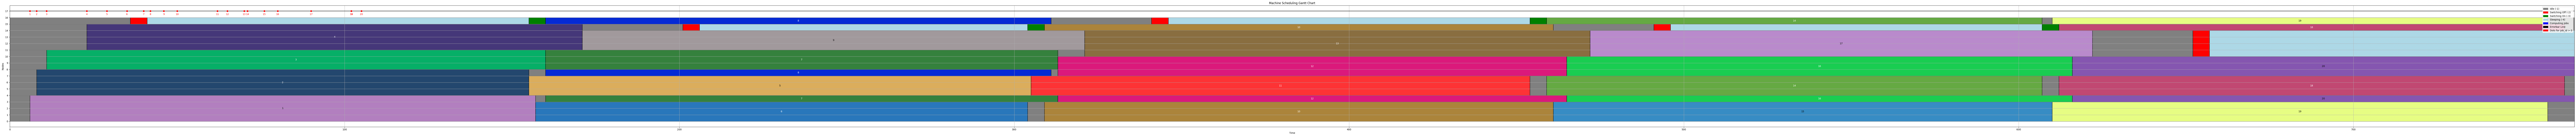

In [4]:
# PLOT SCHEDULE WITH SUBTIME
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd

timeout = 30
predict = False
data = pd.read_csv(f"results/cssp/{'tp' if predict else f'timeout'}/easy_nodes_t{timeout}{'_predict' if predict else ''}.csv")
# data = pd.read_csv('results/sp/rl/easy_nodes.csv')

all_nodes = set()
timeline = []

for index, row in data.iterrows():
    nodes = list(map(int, row['allocated_resources'].split())) 
    all_nodes.update(nodes)
    timeline.append({
        'submission_time': float(row['submission_time']), 
        'starting_time': float(row['starting_time']), 
        'finish_time': float(row['finish_time']), 
        'allocated_resources': nodes,
        'type': row['type'], 
        'job_id': int(row['job_id']) 
    })

# Create figure
fig, ax = plt.subplots(figsize=(150, 8))
max_time = max([ev['finish_time'] for ev in timeline])
max_node = max(all_nodes)

# Color mapping
colors = {
    -1: 'gray',    
    -2: 'red',        
    -3: 'green',      
    -4: 'lightblue'   
}

job_colors = {}

for event in timeline:
    nodes = sorted(event['allocated_resources'])
    groups = []
    while nodes:
        start = nodes[0]
        end = start
        while nodes and nodes[0] == end:
            end += 1
            nodes.pop(0)
        groups.append((start, end - start))
    
    for y, height in groups:
        if event['job_id'] in colors:
            color = colors[event['job_id']]
        else:
            if event['job_id'] not in job_colors:
                job_colors[event['job_id']] = np.random.rand(3,)
            color = job_colors[event['job_id']]
        
        ax.broken_barh([(event['starting_time'], event['finish_time'] - event['starting_time'])], 
                      (y, height), facecolors=color, edgecolor='black')
        
        if event['job_id'] > 0:
            ax.text((event['starting_time'] + event['finish_time'])/2, y + height/2, 
                    str(event['job_id']), ha='center', va='center',
                    color='white' if np.mean(color) < 0.5 else 'black')

ax.errorbar(x=[5000], y=[17], xerr=5000, fmt='-', color='black')

for event in timeline:
    if event['job_id'] > 0:
        ax.plot(event['submission_time'], 17, 'ro')
        ax.text(event['submission_time'], 16.5, str(event['job_id']), ha='center', va='center', color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Nodes')
ax.set_yticks(range(18))
ax.set_yticklabels(range(18))
ax.set_xlim(0, max_time)
ax.grid(True)

legend_patches = [
    mpatches.Patch(color='gray', label='Idle (-1)'),
    mpatches.Patch(color='red', label='Switching Off (-2)'),
    mpatches.Patch(color='green', label='Switching On (-3)'),
    mpatches.Patch(color='lightblue', label='Sleeping (-4)'),
    mpatches.Patch(color='blue', label='Computing Jobs'),
    mpatches.Patch(color='black', label='Errorbar Line'),
    mpatches.Patch(color='red', label='Dots for job_id > 0')
]
ax.legend(handles=legend_patches, loc='upper right')

plt.title('Machine Scheduling Gantt Chart')
plt.tight_layout()
plt.savefig(f"plt/sp/easy_t{timeout}{'_predict' if predict else ''}.png")
# plt.savefig(f"plt/sp/easy_rl2.png")
plt.show()
